Nama : Ishmael Yudhistira

In [1]:
# Import Library Awal yang diperlukan
import tensorflow as tf
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
# Import File
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-29 06:34:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.79MB/s    in 3m 15s  

2021-04-29 06:37:28 (1.58 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Pre-Processing Data

In [3]:
# Ekstrasi Zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')

In [9]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [10]:
#membuat direktori train dan validation, karena belum terdapat direktori-nya
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [14]:
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

In [11]:
#mengecek ulang
os.listdir('/tmp/rockpaperscissors')

['paper',
 'rps-cv-images',
 'scissors',
 'train',
 'rock',
 'README_rpc-cv-images.txt',
 'val']

In [16]:
#Train Test Split Time
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4, random_state=42)

train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4, random_state=42)

train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4, random_state=42)

In [18]:
len(train_rock_dir)

435

In [19]:
len(val_rock_dir)

291

In [23]:
len(train_scissors_dir)

450

In [24]:
len(val_scissors_dir)

300

In [25]:
len(train_paper_dir)

427

In [22]:
len(val_paper_dir)

285

In [29]:
#membuat direktori train dan val untuk setiap mode
os.mkdir(os.path.join(train_dir, 'rock'))


FileExistsError: ignored

In [30]:
os.mkdir(os.path.join(train_dir, 'scissors'))
os.mkdir(os.path.join(train_dir, 'paper'))

In [31]:
os.listdir('/tmp/rockpaperscissors/train')

['paper', 'scissors', 'rock']

In [32]:
os.mkdir(os.path.join(validation_dir, 'rock'))
os.mkdir(os.path.join(validation_dir, 'scissors'))
os.mkdir(os.path.join(validation_dir, 'paper'))

In [34]:
os.listdir('/tmp/rockpaperscissors/val')

['paper', 'scissors', 'rock']

In [35]:
os.listdir('/tmp/rockpaperscissors/val/paper')

[]

In [39]:
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')
train_paper = os.path.join(train_dir, 'paper')
val_rock = os.path.join(validation_dir, 'rock')
val_scissors = os.path.join(validation_dir, 'scissors')
val_paper = os.path.join(validation_dir, 'paper')

In [40]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [41]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [58]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

Pembuatan Model

In [42]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [65]:
train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      target_size=(150,150),
                      batch_size=32,
                      class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
                      validation_dir,
                      target_size=(150,150),
                      batch_size=32,
                      class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [67]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [68]:
predict = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 46s - loss: 0.9943 - accuracy: 0.5038 - val_loss: 0.8040 - val_accuracy: 0.7125
Epoch 2/20
25/25 - 45s - loss: 0.4785 - accuracy: 0.8200 - val_loss: 0.4477 - val_accuracy: 0.7812
Epoch 3/20
25/25 - 44s - loss: 0.2771 - accuracy: 0.8900 - val_loss: 0.3179 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 45s - loss: 0.2851 - accuracy: 0.9062 - val_loss: 0.2973 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 45s - loss: 0.2347 - accuracy: 0.9150 - val_loss: 0.1949 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 46s - loss: 0.1365 - accuracy: 0.9638 - val_loss: 0.1597 - val_accuracy: 0.9438
Epoch 7/20
25/25 - 46s - loss: 0.1865 - accuracy: 0.9463 - val_loss: 0.1350 - val_accuracy: 0.9688
Epoch 8/20
25/25 - 44s - loss: 0.1522 - accuracy: 0.9588 - val_loss: 0.1693 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 44s - loss: 0.1927 - accuracy: 0.9225 - val_loss: 0.1883 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 44s - loss: 0.1806 - accuracy: 0.9400 - val_loss: 0.2645 - val_accuracy: 0.9062
Epoch 11/

Saving IMG_20210429_153025.jpg to IMG_20210429_153025.jpg
IMG_20210429_153025.jpg
paper


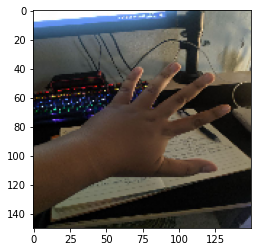

In [69]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')